In [1]:

import sys  
sys.path.insert(0, '/Users/cwilson/desktop/programming/jupyter_tings/healthyride/healthyride')

from trip import Trip
from neighborhood_analytics.neighborhood import Neighborhood

import json


In [2]:
with open('../data.json') as f:
  json_list = json.load(f)
 

In [3]:
print(json_list[0])

{'Trip id': '15964640', 'Bikeid': '70029', 'To station name': "O'Hara St and University Place (Soldiers and Sailors Memorial)", 'Usertype': 'Subscriber', 'Stoptime': '4/1/2016 0:27', 'From station name': 'Maryland Ave & Ellsworth Ave', 'Starttime': '4/1/2016 0:17', 'To station id': '1040', 'Tripduration': '630', '_id': 1, 'From station id': '1031'}


In [4]:
#convert list of dicts to list of objects called "Trips"
Trip_list = []
for dict in json_list:
    li = list(dict.values())
    Trip_list.append(Trip(*li))

In [5]:
#test er out
print(Trip_list[420])
print(Trip_list[420].toname)
print(Trip_list[420].starttime)
print(Trip_list[420].weekday)
print(Trip_list[420].start_neighborhood)

Trip(tripid='16047764', bikeid='70252', toname='S 27th St & Sidney St. (Southside Works)', usertype='Customer', stoptime='4/3/2016 18:15', fromname='North Shore Trail & Fort Duquesne Bridge', starttime='4/3/2016 16:58', toid='1045', tripduration='4638', _id=417, fromid='1012')
S 27th St & Sidney St. (Southside Works)
4/3/2016 16:58
6
North Shore


In [6]:
print(len(Trip_list))

1022303


In [7]:
trip_tuple = Neighborhood.sort_direction_neighborhood_weekday_hour(Trip_list)

arrivals_by_neighborhood = trip_tuple[0]
departures_by_neighborhood = trip_tuple[1]


11


In [8]:
# print the 6th day of the week of arrivals by hour in oakland
print(arrivals_by_neighborhood['Oakland'][6])

{'5': Counter({'Oakland': 35}), '2': Counter({'Oakland': 141}), '6': Counter({'Oakland': 42}), '7': Counter({'Oakland': 67}), '10': Counter({'Oakland': 348}), '11': Counter({'Oakland': 490}), '12': Counter({'Oakland': 646}), '13': Counter({'Oakland': 654}), '14': Counter({'Oakland': 840}), '15': Counter({'Oakland': 801}), '16': Counter({'Oakland': 790}), '18': Counter({'Oakland': 756}), '19': Counter({'Oakland': 622}), '20': Counter({'Oakland': 537}), '21': Counter({'Oakland': 374}), '1': Counter({'Oakland': 194}), '9': Counter({'Oakland': 251}), '17': Counter({'Oakland': 847}), '4': Counter({'Oakland': 23}), '8': Counter({'Oakland': 113}), '22': Counter({'Oakland': 247}), '23': Counter({'Oakland': 191}), '0': Counter({'Oakland': 197}), '3': Counter({'Oakland': 63})}


In [9]:
# print the 6th day of the week of departures by hour in oakland
print(departures_by_neighborhood['Oakland'][6])

{'4': Counter({'Oakland': 33}), '2': Counter({'Oakland': 136}), '6': Counter({'Oakland': 43}), '7': Counter({'Oakland': 74}), '9': Counter({'Oakland': 242}), '10': Counter({'Oakland': 397}), '12': Counter({'Oakland': 674}), '13': Counter({'Oakland': 857}), '14': Counter({'Oakland': 892}), '15': Counter({'Oakland': 920}), '16': Counter({'Oakland': 888}), '17': Counter({'Oakland': 929}), '18': Counter({'Oakland': 721}), '19': Counter({'Oakland': 619}), '20': Counter({'Oakland': 525}), '21': Counter({'Oakland': 341}), '22': Counter({'Oakland': 225}), '8': Counter({'Oakland': 147}), '3': Counter({'Oakland': 104}), '11': Counter({'Oakland': 607}), '23': Counter({'Oakland': 206}), '0': Counter({'Oakland': 231}), '1': Counter({'Oakland': 191}), '5': Counter({'Oakland': 32})}


In [10]:
#function that zips two dictionaries by identical key

def combine_dicts(arrival_dict, departure_dict):
    #order matters, arrivals are first index of tuple, departures follow
    return_dict = {}
    for key in arrival_dict.keys():
        return_dict[key] = (arrival_dict[key], departure_dict[key])
    return return_dict
        

In [11]:
tuple_dict = combine_dicts(arrivals_by_neighborhood, departures_by_neighborhood)

In [12]:
oakland = tuple_dict['Downtown']

In [13]:
from collections import OrderedDict

def make_keys_int(d):
    return_dict = {}
    for key in d.keys():
        return_dict[int(key)] = d[key]
    return return_dict


def order_nested_dict(nested_dict):
    return_dict = {}

    for key, val in OrderedDict(sorted(nested_dict.items())).items():
        nested_dict = make_keys_int(val)

        return_dict[key] = OrderedDict(sorted(nested_dict.items()))
    return return_dict


In [14]:
arrivals, departures = oakland

ordered_arrivals = order_nested_dict(arrivals)
ordered_departures = order_nested_dict(departures)

In [15]:
print(ordered_arrivals.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6])


In [16]:
print(ordered_arrivals[0].keys())

odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])


In [17]:
station_dict = {
    'Downtown': ['1000', '49701', '1002', '1001', '49691', '49671', '1056', '1003', 
                                '49731', '1004', '1006', '49651', '1010'],
    
    'Strip District': ['1016', '1017', '49611', '1059', '1060'],

    'East Liberty' : ['1026', '1027', '1029', '1024', '49391', '49371', '1064'],

    'Lawrenceville' : ['1061', '49581', '1019', '1020', '49501', '49951', '49561', '1018'],

    'North Shore' : ['49941', '49921', '1012', '1013'],

    'Central Northside' : ['1014', '1015', '49881'],

    'Southside Flats' : ['1074', '1049', '1048', '1047', '1046', '1045', '1084'],

    'Oakland' : ['1038', '1044', '1039', '1091', '1093', '1041', '1095', '1036', '1037', '1099', 
                        '1040', '1097', '1035', '1094', '49271'],
    
    'Squirrel Hill' : ['49251', '49261', '1068', '1069', '1070'],
    
    'Shadyside': ['1034', '1033', '1032', '1031'] 

}

In [18]:
station_list = list(station_dict.keys())
station_list.append('Not a station in a defined neighborhood')

In [19]:
arrival_daily_dict = {}
for day, val in ordered_arrivals.items():
    neighborhood_dict = {}
    for key, val in val.items():       
        for i in station_list:
            if i not in neighborhood_dict.keys():
                neighborhood_dict[i] = [val[i]]
            else:
                neighborhood_dict[i] += [val[i]]
    arrival_daily_dict[day] = neighborhood_dict


In [20]:
departure_daily_dict = {}
for day, val in ordered_departures.items():
    neighborhood_dict = {}
    for key, val in val.items():       
        for i in station_list:
            if i not in neighborhood_dict.keys():
                neighborhood_dict[i] = [val[i]]
            else:
                neighborhood_dict[i] += [val[i]]
    departure_daily_dict[day] = neighborhood_dict

In [21]:
print(departure_daily_dict.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6])


In [22]:
print(departure_daily_dict[6])

{'Downtown': [252, 230, 161, 50, 28, 12, 78, 204, 474, 863, 1291, 1549, 1576, 1568, 1545, 1481, 1377, 1287, 1129, 900, 719, 526, 396, 233], 'Strip District': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'East Liberty': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Lawrenceville': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'North Shore': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Central Northside': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Southside Flats': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Oakland': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Squirrel Hill': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Shadyside': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Not a station in a defined neighborhood': [0, 

In [23]:
import matplotlib.pyplot as plt
from weekday_analytics.weekday import dayint_to_daystr




In [24]:
def plot_hours_of_day(ax, day_of_wk, daily_dict):
    

    x = list(range(0, 24))
    
    for key, val in daily_dict.items():
        ax[day_of_wk].title.set_text((dayint_to_daystr(day_of_wk)))
        
        ax[day_of_wk].plot(x, val)
        #ax.plot(x, val)

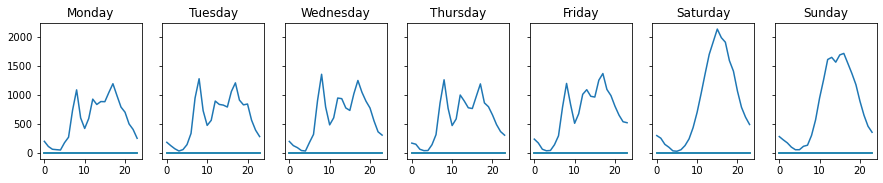

In [25]:
fig, axs = plt.subplots(1, 7, figsize=(15,2.5), sharey = True)
#note that at some point here arrivals are flipped with departures
for key, val in arrival_daily_dict.items():
    plot_hours_of_day(axs, key, val)

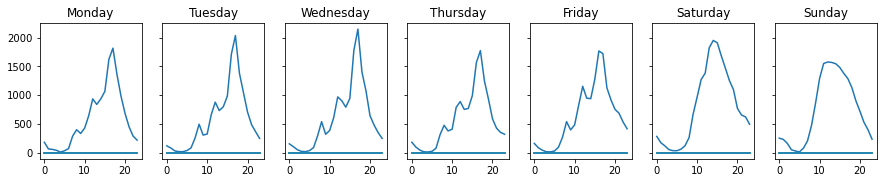

In [26]:
fig, axs = plt.subplots(1, 7, figsize=(15,2.5), sharey = True)
#note that at some point here arrivals are flipped with departures
for key, val in departure_daily_dict.items():
    plot_hours_of_day(axs, key, val)

In [27]:
plt.show()

In [28]:


def plot_neighborhood(neightborhood_tuple):
    #plot just one neighborhood
    arrivals, departures = neightborhood_tuple

    ordered_arrivals = order_nested_dict(arrivals)
    ordered_departures = order_nested_dict(departures)

    for key, val in ordered_arrivals.items():
        d



    

In [29]:
def plot_

SyntaxError: invalid syntax (<ipython-input-29-f92c0c94650a>, line 1)

In [ ]:
plot_neighborhood(oakland)